<a href="https://colab.research.google.com/github/Achmad96/anomaly-fraud-detection/blob/master/Supervised_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from pathlib import Path

drive_path = Path('/content/drive')
drive.mount(str(drive_path))
drive_path /= 'MyDrive'

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, auc, precision_recall_curve
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

In [ ]:
df = pd.read_csv(drive_path / 'creditcard.csv')
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [ ]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
counts = np.bincount(y_train)
weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

In [ ]:
weight_for_0, weight_for_1

(np.float64(4.396551345124884e-06), np.float64(0.0025380710659898475))

In [ ]:
total = len(y_train)
class_weight = {0: (1 / counts[0]) * (total / 2.0),
                1: (1 / counts[1]) * (total / 2.0)}

In [ ]:
class_weight

{0: np.float64(0.5008661206149897), 1: np.float64(289.1434010152284)}

In [ ]:
def build_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid') # Sigmoid for binary classification
    ])

    # Define metrics: Focus on Precision, Recall, and AUC
    metrics = [
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc', curve='PR') # Precision-Recall AUC
    ]

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)
    return model

In [ ]:
model = build_model(X_train.shape[1])

In [ ]:
early_stopping = callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=2048, # Large batch size helps with imbalanced data
    class_weight=class_weight,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - auc: 0.0624 - loss: 0.9731 - precision: 0.0046 - recall: 0.3715 - val_auc: 0.5369 - val_loss: 0.4348 - val_precision: 0.0158 - val_recall: 0.9036
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - auc: 0.2981 - loss: 0.3954 - precision: 0.0107 - recall: 0.7868 - val_auc: 0.6494 - val_loss: 0.3094 - val_precision: 0.0273 - val_recall: 0.9036
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - auc: 0.3997 - loss: 0.3169 - precision: 0.0188 - recall: 0.8586 - val_auc: 0.6873 - val_loss: 0.2134 - val_precision: 0.0475 - val_recall: 0.8916
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - auc: 0.4999 - loss: 0.2423 - precision: 0.0283 - recall: 0.8811 - val_auc: 0.6836 - val_loss: 0.1847 - val_precision: 0.0455 - val_recall: 0.8916
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - auc: 0.4824 - loss: 0.1860 - precision: 0.0313 - recall: 0.9199 - val_auc: 0.6967 - val_loss: 0.1430 - val_precision: 0.0566 - val_recall: 0.8916


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"Area Under PR Curve: {pr_auc:.4f}")

Area Under PR Curve: 0.7544


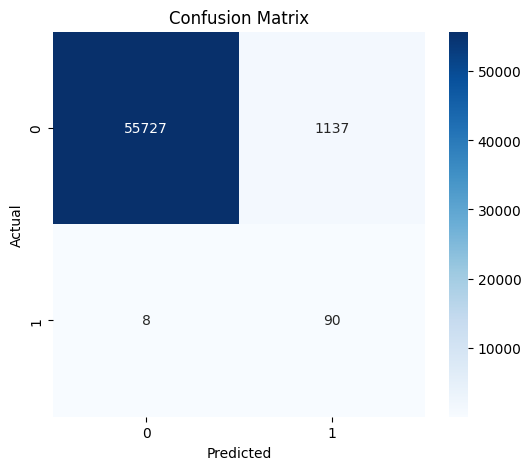

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import random
fraud_sample = df[df['Class'] == 1].sample(1)
features_only = fraud_sample.drop('Class', axis=1).values
fraud_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68522,-0.87986,0.206075,1.38736,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,...,0.469199,0.34493,-0.203799,0.37664,0.715485,0.226003,0.628545,0.319918,-0.350191,1


In [ ]:
probability = model.predict(features_only)

threshold = 0.3

if probability[0][0] >= threshold:
    print(f"ALERT: Potential Fraud Detected! (Score: {probability[0][0]:.4f})")
else:
    print(f"Transaction Approved. (Fraud Score: {probability[0][0]:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
ALERT: Potential Fraud Detected! (Score: 1.0000)
